# I. Designing certificates

## I.1 Product Design 
This structured product offers exposure to Microsoft’s upside potential driven by its strong position in the AI
sector while providing partial downside protection against broader AI-related risks. Microsoft has strength-
ened its AI leadership through strategic investments, particularly its partnership with OpenAI. However,
developments such as the Deepspeak presentation highlight ongoing uncertainties in the U.S. AI landscape.
The product consists of three components
designed to outperform Microsoft stock
in expected market scenarios. First, a 5%
out-of-the-money (OTM) put option pro-
vides partial downside protection. This is
mirrored by a 5% OTM call option to cap-
ture moderate upside. Additionally, a bi-
nary call option is included, with a barrier
set at 10% above the current spot price.
If the barrier is reached, it pays 20% of
the stock price at the barrier level. The
structured product outperforms the stock
in scenarios where Microsoft decreases by
up to 6% or increases by 10% or more

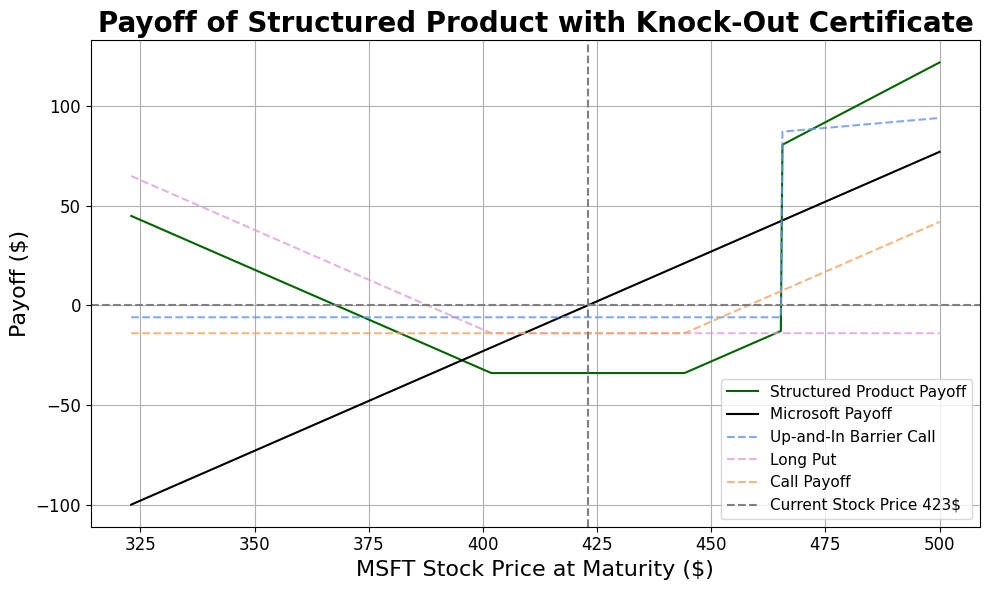

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Price range at maturity
S0 = 423
S = np.linspace(S0-100, 500, 500)

# Strike prices
K_call = 1.05*S0
barrier_call = 1.1*S0
K_put = 0.95*S0

# Option costs - the cost are approximated using prices for comparable options with 6 Months duration from onvista
cost_call = 1.4*10
cost_barrier = 6
cost_put = 1.4*10
Long_Knock_Out_cost= 0.5*S0 #cost of knock out certifacte with leverage *2

# Individual payoffs
barrier_call = np.where(S >= barrier_call, S*0.2 - cost_barrier, - cost_barrier)
protective_put = np.where(S <= K_put, K_put - S - cost_put, - cost_put)
call = np.where(S >= K_call, S - K_call - cost_call, - cost_call)


# Combined payoff
combined = barrier_call + protective_put + call
underlying = S - S0



# Plotting
plt.figure(figsize=(10,6))

plt.plot(S, combined, label='Structured Product Payoff', color='darkgreen')
plt.plot(S, underlying, color='black', linestyle='-', label='Microsoft Payoff')
#plt.plot(S, knock_out_payoff, label='Long Knock Out Payoff', )
plt.plot(S, barrier_call, label='Up-and-In Barrier Call', color="cornflowerblue", linestyle='--', alpha=0.8)
plt.plot(S, protective_put, label='Long Put', linestyle='--', alpha=0.8, color = "plum")
plt.plot(S, call, label='Call Payoff', linestyle="--",alpha=0.8, color ="sandybrown" )


plt.axhline(0, color='gray', linestyle='--')
plt.axvline(S0, color='gray', linestyle='--', label='Current Stock Price 423$')
plt.title('Payoff of Structured Product with Knock-Out Certificate', fontweight = "bold", fontsize=20)
plt.xlabel('MSFT Stock Price at Maturity ($)', fontsize = 16)
plt.ylabel('Payoff ($)', fontsize = 16)
plt.tick_params(labelsize = 12)
plt.legend(fontsize = 11)
plt.grid(True)
plt.tight_layout()
plt.show()



In [53]:
for i in range(1, len(S)):
    if (combined[i-1] - underlying[i-1]) * (combined[i] - underlying[i]) < 0:
        print(f"Intersection around S = {S[i]:.2f}")

Intersection around S = 395.72
Intersection around S = 465.59


In [54]:
percentage_decrease = 1- 395.72/423 
percentage_increase = 465.59/423 - 1

print(f"Intersection around S = {percentage_decrease:.4f}")
print(f"Intersection around S = {percentage_increase:.4f}")

Intersection around S = 0.0645
Intersection around S = 0.1007
